# Using the reference regions in Python.

**Companion to the paper “An update of IPCC climate reference regions for subcontinental analysis of climate model data: Definition and aggregated datasets” (July 2020).**

*Mathias Hauser* - Institute for Atmospheric and Climate Science, ETH Zurich, Zurich, Switzerland

A new set of reference regions is defined in Iturbide et al. (2020) for reporting sub-continental climate information. This tutorial shows how the python package [regionmask](https://regionmask.readthedocs.io/en/stable/) (Hauser, 2019) can be used to plot these regions, and to create masks for arbitrary latitude and longitude grids. These masks can then be used to subset individual regions or to calculate regional averages. The package [xarray](http://xarray.pydata.org/en/stable/) (Hoyer and Hamman, 2017) is used to load netCDF files. 

This tutorial requires regionmask version 0.6.0 or later and xarray version 0.15.1 or later. Check the [documentation of regionmask](https://regionmask.readthedocs.io/en/stable/) for details.


## Imports

Import `regionmask` and check the version: 

In [1]:
import regionmask
regionmask.__version__

'0.6.0'

Import `xarray` and check the version:

In [2]:
import xarray as xr
xr.set_options(display_style="text")
xr.__version__

'0.15.1'

Import additional packages

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(edgeitems=2)

## Loading the reference regions

The regions are available at `regionmask.defined_regions.ar6`. The whole set of 58 regions is available under (`ar6.all`). In addition the land (`ar6.land`) and ocean (`ar6.ocean`) regions are given separately. The numbering is kept consistent between the categories. Note that some regions are in the land and in the ocean categories (e.g. the Mediterranean).

In [4]:
regionmask.defined_regions.ar6


AR6 reference regions - Iturbide et al., 2020

Attributes
----------
all : Regions
    All regions (land + ocean).
land : Regions
    Land regions only
ocean : Regions
    Ocean regions only


We will illustrate the use of regionmask with `regionmask.defined_regions.ar6.all` 

In [5]:
ar6_all = regionmask.defined_regions.ar6.all
ar6_all

<regionmask.Regions>
Name:     AR6 reference regions
Source:   Iturbide et al., 2020 (Earth Syst. Sci. Data)

Regions:
  0  GIC       Greenland/Iceland
  1  NWN       N.W.North-America
  2  NEN       N.E.North-America
  3  WNA         W.North-America
  4  CNA         C.North-America
..   ...                     ...
 53  ARS             Arabian-Sea
 54  BOB           Bay-of-Bengal
 55  EIO  Equatorial.Indic-Ocean
 56  SIO           S.Indic-Ocean
 57  SOO          Southern-Ocean

[58 regions]

## Plotting

`ar6_all.plot()` creates an cartopy map plot including the outline of all regions. It returns an `axes` instance.

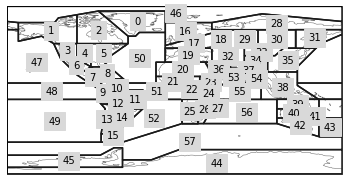

In [6]:
ax = ar6_all.plot()

The plot can also be customized:

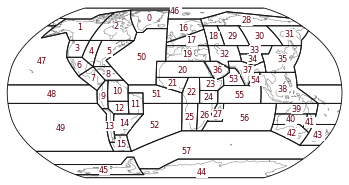

In [7]:
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Robinson()))

text_kws = dict(color="#67000d", fontsize=8, bbox=dict(pad=0.2, color="w"))

ax = ar6_all.plot(
    ax=ax,
    add_ocean=False,
    line_kws=dict(linewidth=1),
    coastlines=False,
    text_kws=text_kws,
)

ax.coastlines(color="0.5", lw=0.5);

## Selecting Regions

Selecting regions is done by indexing (note the double brackets):

In [8]:
new_zealand = ar6_all[[43]]
new_zealand

<regionmask.Regions>
Name:     AR6 reference regions
Source:   Iturbide et al., 2020 (Earth Syst. Sci. Data)

Regions:
 43  NZ  New-Zealand

[1 regions]

We plot the selected region and color the ocean blue with `add_ocean=True`:

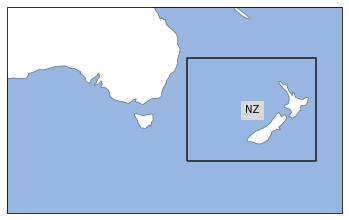

In [9]:
projection = ccrs.PlateCarree(central_longitude=180)

ax = new_zealand.plot(proj=projection, label="abbrev", add_ocean=True)

ax.set_extent([120, 185, -20, -60], ccrs.PlateCarree())

Regions can also be selected by their abbreviation or name, let's select several regions at once:

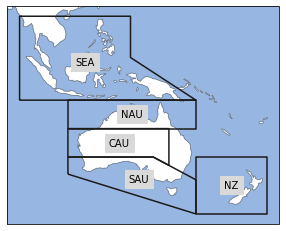

In [10]:
australasia = ar6_all[["NZ", "SEA", "NAU", "C.Australia", "SAU"]]

ax = australasia.plot(proj=projection, label="abbrev", add_ocean=True)

## Example Dataset

In this example we will consider a NetCDF file with historical temperature simulations and show several analysis and visualizations at a global scale or filtering by regions. Therefore, we load an example dataset from the CMIP6 archive using `xarray`. The dataset corresponds to the following ESGF request: 
 - MIP Era: CMIP6
 - Source ID: CESM2
 - Experiment ID: historical
 - Variant Label: r1i1p1f1
 - Table ID: Amon
 - Frequency: mon
 - Variable: tas 
 
Note: if you do not have access to a tas dataset you can replace the code cell below with the following:

```python
ds = xr.tutorial.load_dataset("air_temperature")
tas = ds.air
# calculate monthly mean
tas = tas.resample(time="m").mean()
```

In [11]:
fN = ("/net/atmos/data/cmip6/historical/Amon/tas/CESM2/r1i1p1f1/gn/"
      "tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc") 

ds = xr.open_dataset(fN)

tas = ds.tas

# calculate annual mean
tas = tas.groupby("time.year").mean("time")
tas = tas.rename(year="time")

/home/mathause/conda/envs/test_tutorial/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [12]:
# convert to celsius
tas = tas - 273.15

tas

<xarray.DataArray 'tas' (time: 165, lat: 192, lon: 288)>
array([[[-48.684494, -48.684525, ..., -48.684525, -48.684525],
        [-48.253876, -48.28221 , ..., -48.248764, -48.25035 ],
        ...,
        [-16.856567, -16.84842 , ..., -16.875336, -16.86557 ],
        [-17.187271, -17.185944, ..., -17.190323, -17.188705]],

       [[-48.124863, -48.124863, ..., -48.124863, -48.124863],
        [-47.671463, -47.70305 , ..., -47.66165 , -47.665604],
        ...,
        [-16.613586, -16.608215, ..., -16.625702, -16.619415],
        [-16.764862, -16.764221, ..., -16.76651 , -16.765686]],

       ...,

       [[-47.546295, -47.546295, ..., -47.546295, -47.546295],
        [-47.462982, -47.493927, ..., -47.452133, -47.457   ],
        ...,
        [-11.757538, -11.755005, ..., -11.763336, -11.760315],
        [-11.841766, -11.841248, ..., -11.842987, -11.842346]],

       [[-47.10086 , -47.10086 , ..., -47.10086 , -47.10086 ],
        [-46.680695, -46.710846, ..., -46.671967, -46.675323],
        ...,
        [-13.907043, -13.90155 , ..., -13.917969, -13.912445],
        [-13.778748, -13.77887 , ..., -13.778381, -13.778564]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014

The example data is a temperature field. Let's plot the first time step:

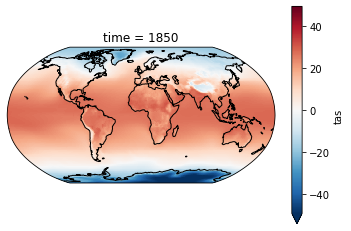

In [13]:
proj = ccrs.Robinson()

f, ax = plt.subplots(subplot_kw=dict(projection=proj))

h = tas.isel(time=0).plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), robust=True, center=0
)

ax.coastlines();

## Creating a 2D integer mask

We illustrate the creation of masks using the land regions:

In [14]:
ar6_land = regionmask.defined_regions.ar6.land

Using `ar6_land.mask(lon, lat)` we can create an array where each grid cell is numbered according to the region it belongs to. Grid cells that are not part of any region are `NaN`. We can directly pass an xarray object containing `lon` and `lat` coordinates to the `mask` function.

In [15]:
mask_2D = ar6_land.mask(tas)

The resulting mask indicates which region each grid point belongs to and looks as follows:

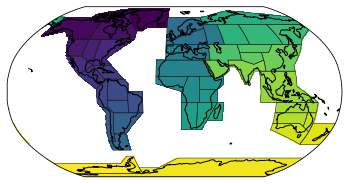

In [16]:
proj = ccrs.Robinson()
f, ax = plt.subplots(subplot_kw=dict(projection=proj))

h = mask_2D.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)

ax.coastlines()

ar6_land.plot_regions(line_kws=dict(lw=0.5), add_label=False);

## Creating a 3D boolean mask

2D masks are good for plotting. However, to calculate weighted regional averages 3D boolean masks are more convenient. 3D masks are created as follows:

In [17]:
mask_3D = ar6_land.mask_3D(tas)
mask_3D

<xarray.DataArray 'region' (region: 46, lat: 192, lon: 288)>
array([[[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       ...,

       [[ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]]])
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
    abbrevs  (region) <U4 'GIC' 'NWN' 'NEN' 'WNA' ... 'SAU' 'NZ' 'EAN' 'WAN'
    names    (region) <U22 'Greenland/Iceland' ... 'W.Antarctica'

`ar6_land.mask_3D` uses the same algorithm to determine if a gridpoint is in a region as for the 2D mask. However, it returns a `xarray.Dataset` with shape `region x lat x lon`. Gridpoints that belong to a region are `True`, all others are `False`.

The first two regions look as follows:

/home/mathause/conda/envs/test_tutorial/lib/python3.8/site-packages/xarray/plot/facetgrid.py:371: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


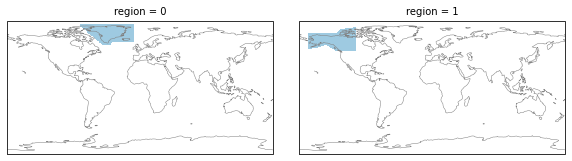

In [18]:
from matplotlib import colors as mplc

cmap1 = mplc.ListedColormap(["none", "#9ecae1"])

fg = mask_3D.isel(region=slice(2)).plot(
    subplot_kws=dict(projection=ccrs.PlateCarree()),
    col="region",
    col_wrap=2,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
    aspect=1.5,
    cmap=cmap1,
)

for ax in fg.axes.flatten():
    ax.coastlines(lw=0.5, color="0.5")

fg.fig.subplots_adjust(hspace=0, wspace=0.1);

### Select a region of a 3D mask
As `mask_3D` contains region, abbrevs, and names as (non-dimension) coordinates we can use each of those to select an individual region:

In [19]:
# 1) by the index of the region:
r1 = mask_3D.sel(region=2)

# 2) with the abbreviation
r2 = mask_3D.isel(region=(mask_3D.abbrevs == "CNA"))

# 3) with the long name:
r3 = mask_3D.isel(region=(mask_3D.names == "C.North-America"))

## Mask out a region

Using `tas.where` a specific region can be 'masked out' (i.e. all data points outside of the region become NaN):

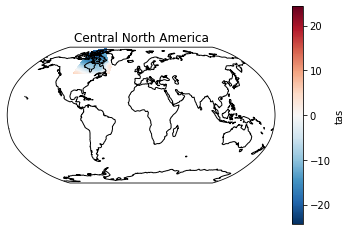

In [20]:
tas_CNA = tas.where(r1)

proj = ccrs.Robinson()

ax = plt.subplot(111, projection=proj)

tas_CNA.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())

ax.set_title("Central North America")

ax.coastlines();

Note this also works with a 2D mask, using `tas.where(mask_2D == 2)`.

## Calculate weighted regional averages
Using the 3-dimensional mask it is possible to calculate weighted averages of all regions in one go, using the weighted method (requires xarray 0.15.1 or later). Here, we use `cos(lat)` as proxy of the grid area. This works well for the rectangular grid in our example. In general, it is better to the model's own grid area.

In [21]:
weights = np.cos(np.deg2rad(tas.lat))

tas_regional = tas.weighted(mask_3D * weights).mean(dim=("lat", "lon"))

Let’s break down what happens here. By multiplying `mask_3D * weights` we get a DataArray where gridpoints within a region get a weight proportional to the gridcell area and all others get a weight of 0. `airtemps.weighted(mask_3D * weights)` creates an xarray object which can be used for weighted operations. From this we calculate the weighted mean over the lat and lon dimensions. The resulting dataarray has the dimensions `region x time`:

In [22]:
tas_regional

<xarray.DataArray (time: 165, region: 46)>
array([[-11.4818801 ,  -1.95047531, ..., -31.55067756, -19.63909115],
       [-12.39708489,  -1.74475079, ..., -30.56577237, -19.60219786],
       ...,
       [ -9.3404994 ,  -0.50705536, ..., -30.28357892, -17.7697203 ],
       [-10.53760483,  -1.6376115 , ..., -29.59403257, -17.97165143]])
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
    abbrevs  (region) <U4 'GIC' 'NWN' 'NEN' 'WNA' ... 'SAU' 'NZ' 'EAN' 'WAN'
    names    (region) <U22 'Greenland/Iceland' ... 'W.Antarctica'

The regionally-averaged time series can be plotted:

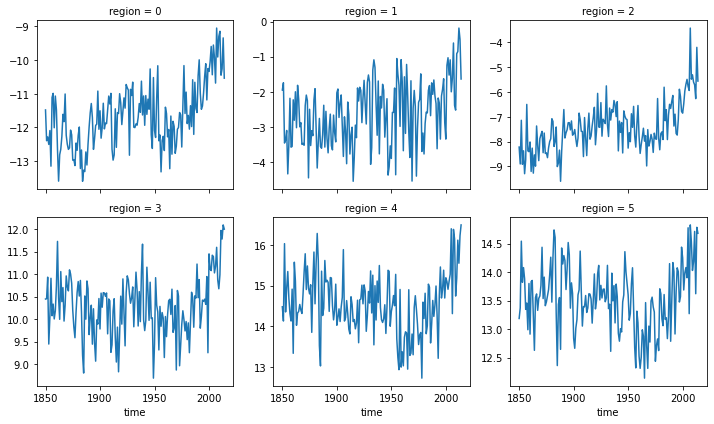

In [23]:
tas_regional.isel(region=slice(6)).plot(col="region", col_wrap=3, sharey=False);

## Restrict the mask to land points

Combining the mask of the regions with a land-sea mask we can create a mask containing only land points. For simplicity we use the `natural_earth.land_110` regions to create a land mask but generally it is recommended to use the model’s original land/ sea mask.

With this caveat in mind we can create the land-sea mask and plot it:

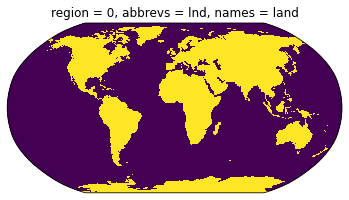

In [24]:
land_110 = regionmask.defined_regions.natural_earth.land_110

land_mask = land_110.mask_3D(tas)

# add a plot
ax = plt.axes(projection=ccrs.Robinson())
land_mask.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False);

To create the combined mask we multiply the two:

In [25]:
mask_lsm = mask_3D * land_mask.squeeze(drop=True)

Note the `.squeeze(drop=True)`. This is required to remove the region dimension from land_mask.

The resulting `mask_lsm` is also a 3D mask which cannot be directly plotted. For this `regionmask.plot_3D_mask` is given as convenience function to flatten and plot 3D masks:

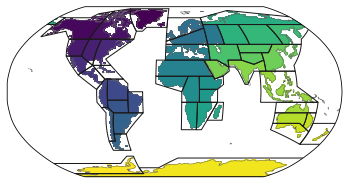

In [26]:
ar6_land.plot(add_label=False, line_kws=dict(lw=1), proj=ccrs.Robinson())

regionmask.plot_3D_mask(mask_lsm, transform=ccrs.PlateCarree(), add_colorbar=False);

We can now again calculate the regional mean temperature for all land points:

In [27]:
tas_regional_land = tas.weighted(mask_lsm * weights).mean(dim=("lat", "lon"))

and compare it to the temperature of the land and ocean:

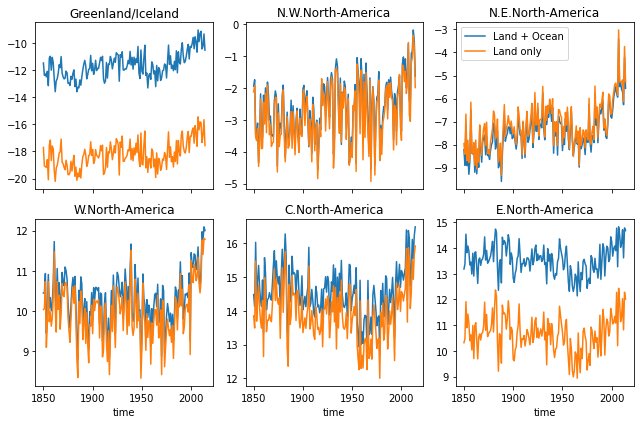

In [28]:
f, axes = plt.subplots(2, 3, sharex=True, figsize=(9, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):

    ds = tas_regional.isel(region=i)
    ds.plot(ax=ax, label="Land + Ocean")

    ds = tas_regional_land.isel(region=i)
    ds.plot(ax=ax, label="Land only")

    ax.set_title(ds.names.values)
    if i < 3:
        ax.set_xlabel("")

axes[2].legend()
plt.tight_layout()

## References

Hauser M. (2019), Regionmask: plotting and creation of masks of spatial regions in Python, *Zenodo*, [doi:10.5281/zenodo.3585542](https://zenodo.org/record/3585542).

Hoyer, S. and Hamman, J., 2017. xarray: N-D labeled Arrays and Datasets in Python. *Journal of Open Research Software*, 5(1), p.10. DOI: [doi:10.5334/jors.148](http://doi.org/10.5334/jors.148).

## Calculating weighed averages in xarray prior to version 0.15.1

xarray only offers weighted averages since version 0.15.1. For users of older versions the a `weighted_mean` function is provided below. This function can also compute the weighed mean over all regions (`weighted_mean(tas, mask_3D * weights, ("lon", "lat"))`), however, it is less memory efficient and much slower than the one implemented in xarray.


In [29]:
def weighted_mean(da, weights, dim):
    """Reduce da by a weighted mean along some dimension(s).

    Parameters
    ----------
    da : DataArray
        Object over which the weighted reduction operation is applied.    
    weights : DataArray
        An array of weights associated with the values in this Dataset.
    dim : str or sequence of str, optional
        Dimension(s) over which to apply the weighted `mean`.
        
    Returns
    -------
    weighted_mean : DataArray
        New DataArray with weighted mean applied to its data and
        the indicated dimension(s) removed.
    """

    weighted_sum = (da * weights).sum(dim=dim, skipna=True)
    # need to mask weights where data is not valid
    masked_weights = weights.where(da.notnull())
    sum_of_weights = masked_weights.sum(dim=dim, skipna=True)
    valid_weights = sum_of_weights != 0
    sum_of_weights = sum_of_weights.where(valid_weights)

    return weighted_sum / sum_of_weights

## Requirements

Running this notebook requires the regionmask, netCDF4 and jupyter packages (all other packages are dependencies). regionmask itself is a pure Python package, but its dependencies are not. The easiest way to get them installed is to use [conda](http://conda.io/). The package is avilable on the conda-forge channel.

    conda install -c conda-forge regionmask xarray jupyter netCDF4
 